# 1 神经网络
将再次处理手写数字数据集。这次使用反向传播的前馈神经网络，自动学习神经网络的参数。
## 1.1 数据可视化
这部分的数据和ex3里是一样的，5000张20*20像素的手写数字数据集，以及对应的数字（1-9，0对应10）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = loadmat('E:\机器学习(吴恩达)\ML数据\ml_ex4\ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X = data['X']
y = data['y']
X.shape, y.shape   # 显示维度

((5000, 400), (5000, 1))

In [4]:
weight = loadmat('E:\机器学习(吴恩达)\ML数据\ml_ex4\ex4weights.mat')
theta1, theta2 = weight['Theta1'], weight['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

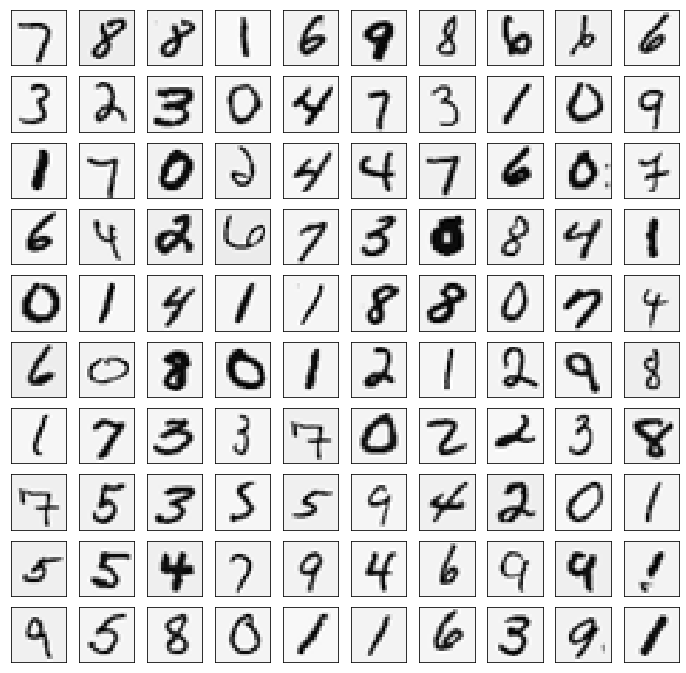

In [5]:
sample_idx = np.random.choice(np.arange(data['X'].shape[0]), 100)
sample_images = data['X'][sample_idx, :]
fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(12, 12))
for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(np.array(sample_images[10 * r + c].reshape((20, 20))).T, cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

## 1.2 模型展示（同ex3的第二部分）

## 1.3 前向传播和代价函数

实现神经网络的代价函数和梯度函数（适用于任何数据集 包括任意数量的输入输出单元）

In [6]:
def sigmiod(z):
    return 1 / (1 + np.exp(-z))

In [7]:
#前向传播函数
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    
    a1 = np.insert(X, 0, values=np.ones(m), axis=1)
    z2 = a1 * theta1.T
    a2 = np.insert(sigmiod(z2), 0, values=np.ones(m), axis=1)
    z3 = a2 * theta2.T
    h = sigmiod(z3)
    
    return a1, z2, a2, z3, h

In [8]:
# 代价函数

def cost(theta1, theta2, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # 运行向前传播
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # 计算成本
    J = 0 
    for i in range(m):
        first_term = np.multiply(-y[i, :], np.log(h[i, :]))
        second_term = np.multiply((1 - y[i, :]), np.log(1 - h[i, :]))
        J += np.sum(first_term - second_term)
        
    J = J / m
    
    return J

对y标签进行编码
一开始我们得到的y是$5000*1$维的向量，但我们要把他编码成$5000*10$的矩阵。
比如说，原始$y_0=2$，那么转化后的Y对应行就是[0,1,0...0]，原始$y_1=0$转化后的Y对应行就是[0,0...0,1]

Scikitlearn有一个内置的编码函数，可以使用这个。

In [9]:
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
y_onehot.shape

E:\Program Files\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(5000, 10)

In [10]:
y[0], y_onehot[0, :]  # y0 是数字0


(array([10], dtype=uint8), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))